# DFE parametrizations

The DFE needs to be parametrized in some way in order to be amenable to maximum likelihood estimation. {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default. Other parametrizations are also implemented (cf. {mod}`~fastdfe.parametrization`). You can also create your own parametrization by subclassing {class}`~fastdfe.parametrization.Parametrization`.

To see how the parametrization affects the shape of the DFE, we use our example data for `B. pendula`.

In [3]:
setwd("/Users/au732936/PycharmProjects/fastDFE")

reticulate::use_condaenv("/Users/au732936/miniconda3/envs/dev-r-fastdfe", required=TRUE)

source("R/fastdfe.R")
fd <- load_fastdfe()

In [1]:
library(fastdfe)

# load the fastdfe package
fd <- load_fastdfe()

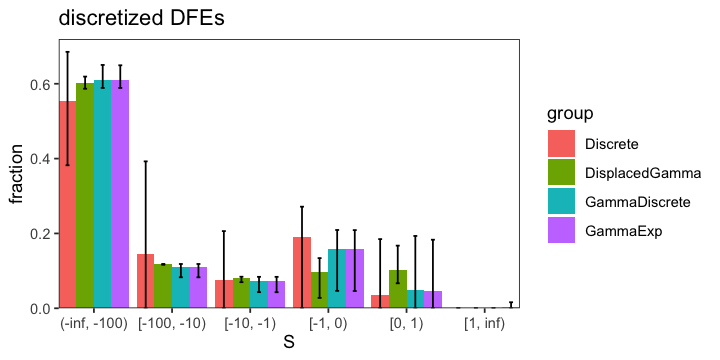

In [4]:
# the different DFE parametrizations
parametrizations = c(
    fd$GammaExpParametrization(),
    fd$DiscreteParametrization(),
    fd$GammaDiscreteParametrization(),
    fd$DisplacedGammaParametrization()
)

inferences <- vector("list", length = 4)

for(i in seq_along(parametrizations)) {
    # create inference object
    inference <- fd$BaseInference(
        sfs_neut = fd$Spectrum(c(177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652)),
        sfs_sel = fd$Spectrum(c(797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 794)),
        model = parametrizations[[i]],
        do_bootstrap = TRUE
    )

    # run inference
    inference$run()

    inferences[[i]] <- inference
}

# set plot size
options(repr.plot.width = 6, repr.plot.height = 3)

# plot the inferred DFEs
p <- fd$Inference$plot_discretized(
    inferences = inferences,
    labels = c("GammaExp", "Discrete", "GammaDiscrete", "DisplacedGamma")
)

The shape is rather similar overall, but {class}`~fastdfe.parametrization.DiscreteParametrization` appears to have larger confidence intervals.